# WeatherPy
----



In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"

city_name = []
temperatures = []
humidity = []
cloudiness = []
windspeed = []
lat = []
long = []
country = []
date = []

print(f"Beginning Data Retrieval")
print("--------------------------")

for index, city in enumerate(cities): 
    print(f"Processing Record {index + 1} of {len(cities)} | {city}")
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    try: 
        long.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temperatures.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        city_name.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        
    except: 
        print(f"City not found. Skipping...")
        
        

print("--------------------------")
print(f"Data Retrieval Complete")
print("--------------------------")
    

Beginning Data Retrieval
--------------------------
Processing Record 1 of 600 | saldanha
Processing Record 2 of 600 | georgetown
Processing Record 3 of 600 | barrow
Processing Record 4 of 600 | saskylakh
Processing Record 5 of 600 | hilo
Processing Record 6 of 600 | busselton
Processing Record 7 of 600 | taolanaro
City not found. Skipping...
Processing Record 8 of 600 | albany
Processing Record 9 of 600 | kavaratti
Processing Record 10 of 600 | attawapiskat
City not found. Skipping...
Processing Record 11 of 600 | hokitika
Processing Record 12 of 600 | ushuaia
Processing Record 13 of 600 | qunduz
Processing Record 14 of 600 | nikolskoye
Processing Record 15 of 600 | cape town
Processing Record 16 of 600 | atuona
Processing Record 17 of 600 | sorvag
City not found. Skipping...
Processing Record 18 of 600 | touros
Processing Record 19 of 600 | vaitupu
City not found. Skipping...
Processing Record 20 of 600 | mantua
Processing Record 21 of 600 | warrington
Processing Record 22 of 600 | p

City not found. Skipping...
Processing Record 192 of 600 | panguna
Processing Record 193 of 600 | pisco
Processing Record 194 of 600 | areado
Processing Record 195 of 600 | perth
Processing Record 196 of 600 | henties bay
Processing Record 197 of 600 | laguna
Processing Record 198 of 600 | severo-kurilsk
Processing Record 199 of 600 | bonavista
Processing Record 200 of 600 | narsaq
Processing Record 201 of 600 | port elizabeth
Processing Record 202 of 600 | ampanihy
Processing Record 203 of 600 | bairnsdale
Processing Record 204 of 600 | port macquarie
Processing Record 205 of 600 | mehamn
Processing Record 206 of 600 | caborca
Processing Record 207 of 600 | otane
Processing Record 208 of 600 | asau
Processing Record 209 of 600 | rio grande
Processing Record 210 of 600 | tawkar
City not found. Skipping...
Processing Record 211 of 600 | rancho palos verdes
Processing Record 212 of 600 | kazalinsk
City not found. Skipping...
Processing Record 213 of 600 | tiznit
Processing Record 214 of 

Processing Record 382 of 600 | maues
Processing Record 383 of 600 | lake charles
Processing Record 384 of 600 | talara
Processing Record 385 of 600 | touho
Processing Record 386 of 600 | itarema
Processing Record 387 of 600 | shache
Processing Record 388 of 600 | arlit
Processing Record 389 of 600 | hambantota
Processing Record 390 of 600 | wajima
Processing Record 391 of 600 | abu dhabi
Processing Record 392 of 600 | bonthe
Processing Record 393 of 600 | constitucion
Processing Record 394 of 600 | belogorsk
Processing Record 395 of 600 | belmonte
Processing Record 396 of 600 | coos bay
Processing Record 397 of 600 | middelkerke
Processing Record 398 of 600 | mogok
Processing Record 399 of 600 | tezu
Processing Record 400 of 600 | sinnamary
Processing Record 401 of 600 | chanika
Processing Record 402 of 600 | dzhusaly
City not found. Skipping...
Processing Record 403 of 600 | saint-joseph
Processing Record 404 of 600 | caceres
Processing Record 405 of 600 | olafsvik
Processing Record 4

Processing Record 578 of 600 | yunjinghong
City not found. Skipping...
Processing Record 579 of 600 | haimen
Processing Record 580 of 600 | sokoto
Processing Record 581 of 600 | jiroft
City not found. Skipping...
Processing Record 582 of 600 | adelaide
Processing Record 583 of 600 | samusu
City not found. Skipping...
Processing Record 584 of 600 | martinopolis
Processing Record 585 of 600 | banmo
City not found. Skipping...
Processing Record 586 of 600 | vao
Processing Record 587 of 600 | gamba
Processing Record 588 of 600 | chara
Processing Record 589 of 600 | rawson
Processing Record 590 of 600 | hihifo
City not found. Skipping...
Processing Record 591 of 600 | tarudant
City not found. Skipping...
Processing Record 592 of 600 | kismayo
Processing Record 593 of 600 | rehoboth
Processing Record 594 of 600 | sakakah
Processing Record 595 of 600 | faya
Processing Record 596 of 600 | koygorodok
Processing Record 597 of 600 | cloquet
Processing Record 598 of 600 | mzimba
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
city_weather_df = pd.DataFrame({"City": city_name, 
                              "Lat": lat,
                              "Lng": long,
                              "Max Temp": temperatures, 
                              "Humidity": humidity,
                              "Cloudiness": cloudiness, 
                              "Wind Speed": windspeed,
                              "Country": country, 
                              "Date": date})
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,60.85,90,12,20.47,ZA,1666558061
1,George Town,5.4112,100.3354,80.53,86,40,14.00,MY,1666557782
2,Barrow,71.2906,-156.7887,21.22,86,20,20.71,US,1666558107
3,Saskylakh,71.9167,114.0833,3.31,99,67,5.77,RU,1666558059
4,Hilo,19.7297,-155.0900,80.33,71,100,6.91,US,1666558075
...,...,...,...,...,...,...,...,...,...
533,Faya,18.3851,42.4509,62.71,66,17,2.86,SA,1666558078
534,Koygorodok,60.4450,50.9968,36.19,92,100,13.65,RU,1666558603
535,Cloquet,46.7216,-92.4594,74.35,64,0,13.80,US,1666558603
536,Mzimba,-11.9000,33.6000,72.28,43,74,12.86,MW,1666558603


In [40]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,20.626909,21.868555,59.517584,72.665428,62.723048,8.946617,1.666558e+09
std,34.258397,87.804220,20.234266,20.557943,39.059419,6.172262,2.329891e+02
min,-54.800000,-175.200000,-5.310000,6.000000,0.000000,0.000000,1.666558e+09
25%,-8.660850,-53.073525,45.055000,63.000000,20.750000,4.125000,1.666558e+09
50%,27.085700,26.443450,64.345000,77.500000,75.500000,7.370000,1.666558e+09
75%,51.060300,96.319175,75.742500,89.000000,100.000000,12.432500,1.666559e+09
max,78.218600,179.316700,92.120000,100.000000,100.000000,29.570000,1.666559e+09


In [41]:
city_weather_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

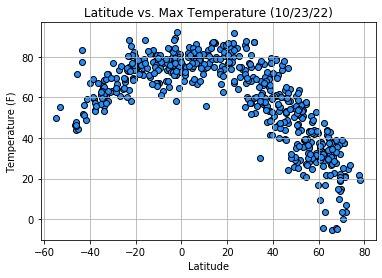

<Figure size 432x288 with 0 Axes>

In [69]:
latitude = city_weather_df["Lat"]
max_temp = city_weather_df["Max Temp"]

fig, ax = plt.subplots()
ax.scatter(latitude, max_temp, marker='o', facecolor='dodgerblue', edgecolor='black')
ax.grid(True)
ax.set_title("Latitude vs. Max Temperature (10/23/22)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature (F)")
plt.show()
plt.savefig('images/lat_vs_temp.png')

The figure plots the latitude of each city vs. the Max Temperature in Fahrenheit captured on 10/23/2022

## Latitude vs. Humidity Plot

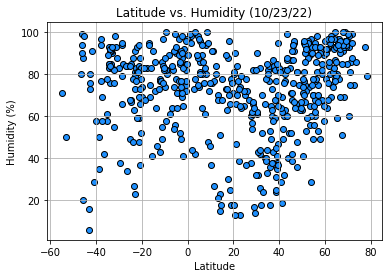

<Figure size 432x288 with 0 Axes>

In [123]:
humidity = city_weather_df["Humidity"]


fig, ax = plt.subplots()
ax.scatter(latitude, humidity, marker='o', facecolor='dodgerblue', edgecolor='black')
ax.grid(True)
ax.set_title("Latitude vs. Humidity (10/23/22)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()
plt.savefig('images/lat_vs_hum.png')

The figure plots the latitude of each city vs. the percentage of humidity captured on 10/23/2022

## Latitude vs. Cloudiness Plot

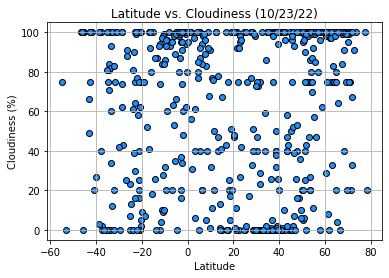

<Figure size 432x288 with 0 Axes>

In [126]:
clouds = city_weather_df["Cloudiness"]


fig, ax = plt.subplots()
ax.scatter(latitude, clouds, marker='o', facecolor='dodgerblue', edgecolor='black')
ax.grid(True)
ax.set_title("Latitude vs. Cloudiness (10/23/22)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()
plt.savefig('images/lat_vs_cloud.png')

The figure plots the latitude of each city vs. the percentage of cloudiness captured on 10/23/2022

## Latitude vs. Wind Speed Plot

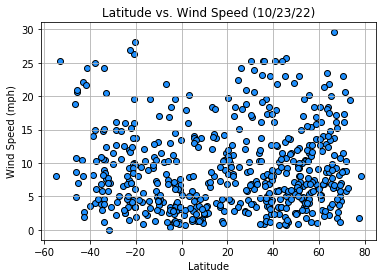

<Figure size 432x288 with 0 Axes>

In [72]:
wind_speed = city_weather_df["Wind Speed"]


fig, ax = plt.subplots()
ax.scatter(latitude, wind_speed, marker='o', facecolor='dodgerblue', edgecolor='black')
ax.grid(True)
ax.set_title("Latitude vs. Wind Speed (10/23/22)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()
plt.savefig('images/lat_vs_wind.png')

The figure plots the latitude of each city vs. the wind speed (mph) captured on 10/23/2022

## Linear Regression

In [124]:
north_hem = city_weather_df.loc[city_weather_df["Lat"] >= 0]
south_hem = city_weather_df.loc[city_weather_df["Lat"] < 0]

north_lat = north_hem["Lat"]
south_lat = south_hem["Lat"]

north_temp = north_hem["Max Temp"]
north_hum = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

south_temp = south_hem["Max Temp"]
south_hum = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8472040845644504


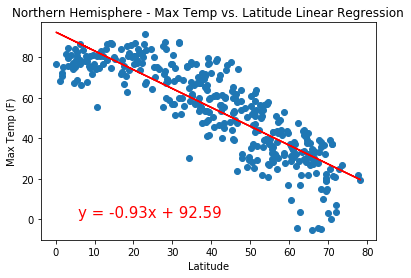

<Figure size 432x288 with 0 Axes>

In [125]:
x_values = north_lat
y_values = north_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/northlat_vs_temp_linregress.png')

The scatter plot shows the correlation between Max Temp and Latitude for cities in the northern hemisphere. The r-value indicates that there is a very strong negative correlation between temperature and latitude in the northern hemisphere, meaning the further north the city is, the lower the max temp is likely to be. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.6866619997969498


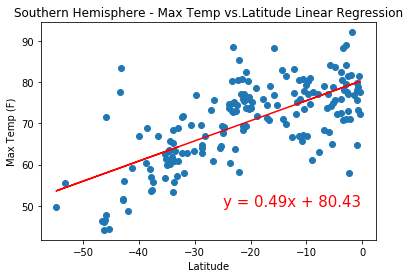

<Figure size 432x288 with 0 Axes>

In [101]:
x_values = south_lat
y_values = south_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs.Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/southlat_vs_temp_linregress.png')

The scatter plot shows the correlation between Max Temp and Latitude for cities in the southern hemisphere. The r-value indicates that there is a strong correlation between temperature and latitude in the southern hemisphere. This could mean that the closer to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.28493356747839804


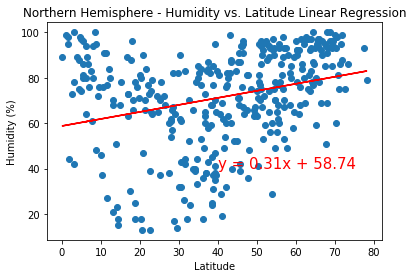

<Figure size 432x288 with 0 Axes>

In [105]:
x_values = north_lat
y_values = north_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/northlat_vs_hum_linregress.png')

The scatter plot shows the correlation between Humidity (%) and Latitude for cities in the northern hemisphere. The r-value indicates that there is a weak correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.1260918284773473


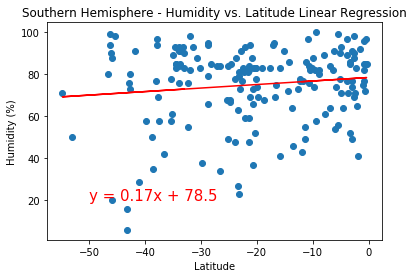

<Figure size 432x288 with 0 Axes>

In [106]:
x_values = south_lat
y_values = south_hum
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/southlat_vs_hum_linregress.png')

The scatter plot shows the correlation between Humidity (%) and Latitude for cities in the northern hemisphere. The r-value indicates that there is a very weak correlation between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.23990535213587957


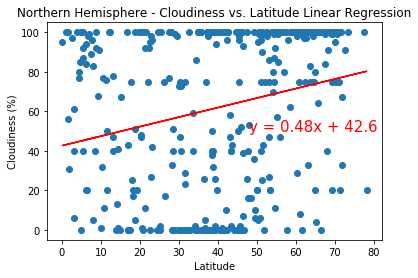

<Figure size 432x288 with 0 Axes>

In [109]:
x_values = north_lat
y_values = north_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,50),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/northlat_vs_cloud_linregress.png')

The scatter plot shows the correlation between Cloudiness (%) and Latitude for cities in the northern hemisphere. The r-value indicates that there is a weak correlation between temperature and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1322733172574001


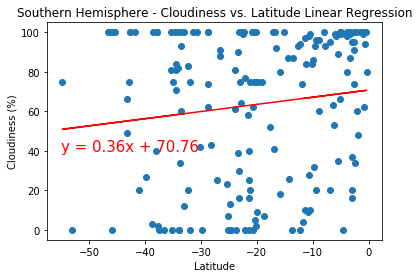

<Figure size 432x288 with 0 Axes>

In [113]:
x_values = south_lat
y_values = south_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/southlat_vs_cloud_linregress.png')

The scatter plot shows the correlation between Cloudiness (%) and Latitude for cities in the southern hemisphere. The r-value indicates that there is a very weak correlation between cloudiness and latitude in the northern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.11248192011971063


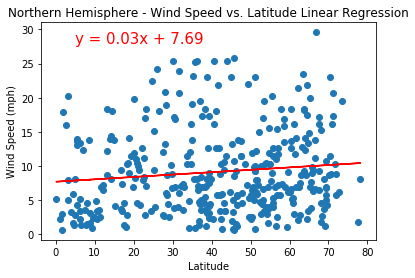

<Figure size 432x288 with 0 Axes>

In [115]:
x_values = north_lat
y_values = north_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,28),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/northlat_vs_wind_linregress.png')

The scatter plot shows the correlation between Wind Speed and Latitude for cities in the northern hemisphere. The r-value indicates that there is a very weak correlation between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.2873950710569358


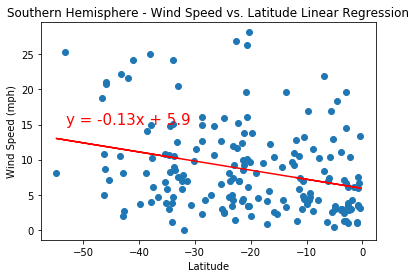

<Figure size 432x288 with 0 Axes>

In [118]:
x_values = south_lat
y_values = south_wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r value is: {rvalue}")
plt.show()
plt.savefig('images/southlat_vs_wind_linregress.png')

The scatter plot shows the correlation between Wind Speed and Latitude for cities in the southern hemisphere. The r-value indicates that there is a weak correlation between temperature and latitude in the northern hemisphere.